In [1]:
## We first import all the libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
## We now load our dataset and define our index

df1 = pd.read_csv('train.csv')
df1.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
## We fix skewness of our target to fit normal distribution. Most of the ML models assume normal distribution.

y = np.log1p(df1['SalePrice'])

In [5]:
## We read our test data

df2 = pd.read_csv('test.csv')
df2.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [6]:
## We merge train and test set into df

ntrain = df1.shape[0]
ntest = df2.shape[0]
df = pd.concat((df1, df2)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(df.shape))
df.set_index('Id', inplace = True)

all_data size is : (2919, 80)


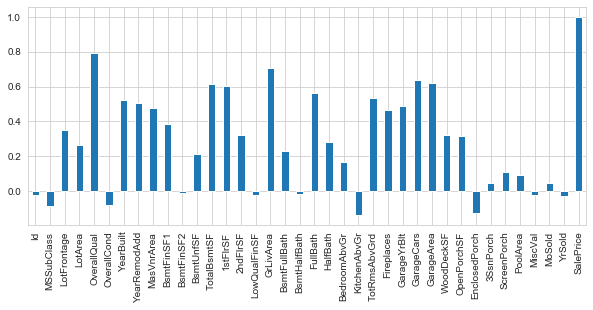

In [7]:
## We plot the correlation of our features with the label

df1.corr()['SalePrice'].plot(kind = 'bar', figsize = (10,4))

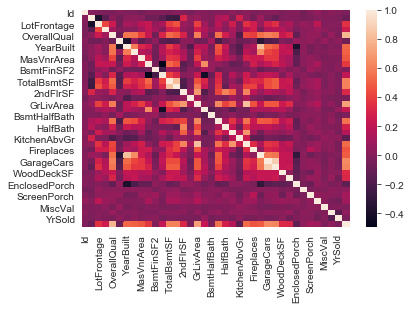

In [8]:
## We create a heatmap of correlations to visualize

sns.heatmap(df1.corr())

In [9]:
## We now check columns with missing values

all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


<module 'matplotlib.tight_layout' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py'>

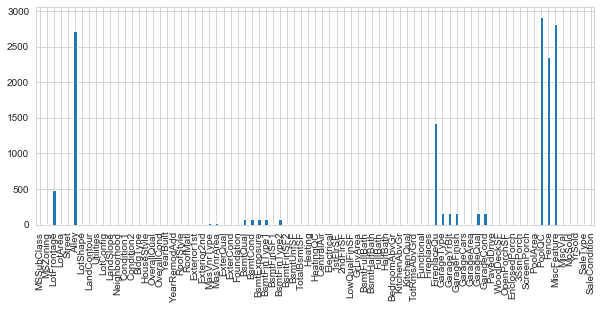

In [10]:
## We plot missing values

df.isna().sum().plot(kind = 'bar', figsize = (10,4))
plt.tight_layout

In [11]:
## We impute our missing values one by one. This will take some time to analyze each feature.

df['Alley'] = df['Alley'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['PoolQC'] = df['PoolQC'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna('RL')
df.drop('Utilities', axis = 1, inplace = True)
df["Functional"] = df["Functional"].fillna("Typ")
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['MSSubClass'] = df['MSSubClass'].fillna("None")

<module 'matplotlib.tight_layout' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py'>

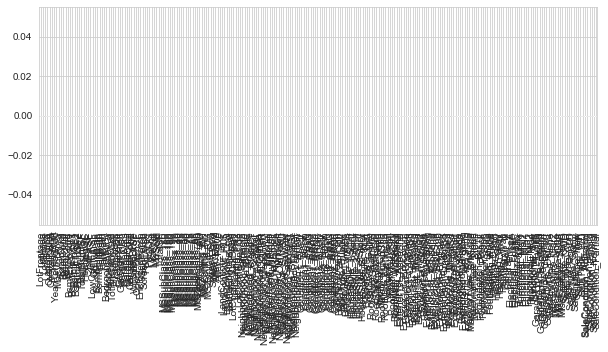

In [37]:
## Now we see that there are no missing values

df.isna().sum().plot(kind = 'bar', figsize = (10,4))
plt.tight_layout

In [38]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [17]:
## Now we will start converting our object variables into numeric variables.

def fn(x):
    if x == 'IR3':
        return(1)
    elif x == 'IR2':
        return(2)
    elif x == 'IR1':
        return(3)
    else: return(4)
df['LotShape'] = df['LotShape'].apply(lambda x: fn(x))

In [18]:
def fn(x):
    if x == 'Sev':
        return(1)
    elif x == 'Mod':
        return(2)
    else: return(3)
df['LandSlope'] = df['LandSlope'].apply(lambda x: fn(x))

In [19]:
def fn(x):
    if x == 'Po':
        return(1)
    elif x == 'Fa':
        return(2)
    elif x == 'TA':
        return(3)
    elif x == 'Gd':
        return(4)
    else: return(5)
df['ExterQual'] = df['ExterQual'].apply(lambda x: fn(x))
df['ExterCond'] = df['ExterCond'].apply(lambda x: fn(x))
df['BsmtQual'] = df['BsmtQual'].apply(lambda x: fn(x))
df['BsmtCond'] = df['BsmtCond'].apply(lambda x: fn(x))

In [20]:
def fn(x):
    if x == 'None':
        return(1)
    elif x == 'No':
        return(2)
    elif x == 'Mn':
        return(3)
    elif x == 'Av':
        return(4)
    else: return(5)
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: fn(x))

In [21]:
def fn(x):
    if x == 'None':
        return(1)
    elif x == 'Unf':
        return(2)
    elif x == 'LwQ':
        return(3)
    elif x == 'Rec':
        return(4)
    elif x == 'BLQ':
        return(5)
    elif x == 'ALQ':
        return(6)
    else: return(7)
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x: fn(x))
df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x: fn(x))

In [22]:
def fn(x):
    if x == 'Po':
        return(1)
    elif x == 'Fa':
        return(2)
    elif x == 'TA':
        return(3)
    elif x == 'Gd':
        return(4)
    else: return(5)
df['HeatingQC'] = df['HeatingQC'].apply(lambda x: fn(x))
df['KitchenQual'] = df['KitchenQual'].apply(lambda x: fn(x))

In [23]:
def fn(x):
    if x == 'None':
        return(1)
    elif x == 'Po':
        return(2)
    elif x == 'Fa':
        return(3)
    elif x == 'TA':
        return(4)
    elif x == 'Gd':
        return(5)
    else: return(6)
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: fn(x))
df['GarageQual'] = df['GarageQual'].apply(lambda x: fn(x))
df['GarageCond'] = df['GarageCond'].apply(lambda x: fn(x))

In [24]:
def fn(x):
    if x == 'None':
        return(1)
    elif x == 'Fa':
        return(2)
    elif x == 'TA':
        return(3)
    elif x == 'Gd':
        return(4)
    else: return(5)
df['PoolQC'] = df['PoolQC'].apply(lambda x: fn(x))

In [25]:
def fn(x):
    if x == 'None':
        return(1)
    elif x == 'MnWw':
        return(2)
    elif x == 'GdWo':
        return(3)
    elif x == 'MnPrv':
        return(4)
    else: return(5)
df['Fence'] = df['Fence'].apply(lambda x: fn(x))

In [26]:
def fn(x):
    if x == 'None':
        return(1)
    elif x == 'Unf':
        return(2)
    elif x == 'RFn':
        return(3)
    else: return(4)
df['GarageFinish'] = df['GarageFinish'].apply(lambda x: fn(x))

In [27]:
def fn(x):
    if x == 'N':
        return(1)
    elif x == 'P':
        return(2)
    else: return(3)
df['PavedDrive'] = df['PavedDrive'].apply(lambda x: fn(x))

In [28]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [29]:
## Let us check if all features look fine

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   int64  
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [30]:
## We create a new feature with total square feet area

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [31]:
## Now we select all the numeric features

numeric_feats = df.dtypes[df.dtypes != "object"].index

In [32]:
## Now we scale our numeric features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[numeric_feats])
df[numeric_feats] = scaler.transform(df[numeric_feats])


In [33]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(df[numeric_feats])
#df[numeric_feats] = scaler.transform(df[numeric_feats])

In [34]:
## We define our dummies

df = pd.get_dummies(df)

In [35]:
## We split the test and train data

train = df[:len(df1)]
test = df[len(df1):]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 420)

In [ ]:
## We now create a pipeline to return RMSE using cross vali

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
score = rmsle_cv(LR)
print("LR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
from sklearn.svm import SVR
SV = SVR()
score = rmsle_cv(SV)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train, y)
pred = np.expm1(LR.predict(test))
solution = pd.DataFrame({"id":df2.Id, "SalePrice":pred})
solution.to_csv("submission1.csv", index = False)

In [ ]:
from sklearn.svm import SVR
SV = SVR()
SV.fit(train, y)
pred = np.expm1(SV.predict(test))
solution = pd.DataFrame({"id":df2.Id, "SalePrice":pred})
solution.to_csv("submission2.csv", index = False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, criterion='mse',)
RF.fit(train, y)
pred = np.expm1(RF.predict(test))
solution = pd.DataFrame({"id":df2.Id, "SalePrice":pred})
solution.to_csv("submission3.csv", index = False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, criterion='mse',)
RF.fit(train, y)
pred = np.expm1(RF.predict(test))
solution = pd.DataFrame({"id":df2.Id, "SalePrice":pred})
solution.to_csv("submission3.csv", index = False)

In [ ]:
x = train.values
y = y.values

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(246 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
model.fit(x=x_train, 
          y=y_train, 
          epochs=1000,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

In [ ]:
model.fit(x_train, y_train, epochs = 1000, validation_data = (x_test,y_test), verbose = 1)

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
pred = np.expm1(model.predict(test.values))
solution = pd.DataFrame({"Id":df2.Id, "SalePrice":pred[:,0]})
solution.to_csv("submission4.csv", index = False)